In [1]:
%matplotlib inline
import random
from mxnet import autograd, gluon, init, np, npx
from d2l import mxnet as d2l
from mxnet.gluon import nn, rnn

npx.set_np()

# Exercises week 9
## 10.1.5.2

In [18]:
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5),
                  cmap='Reds'):
    d2l.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize,
                                 sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.asnumpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6);

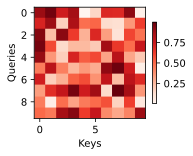

In [25]:
x = np.random.rand(10,10)
z = npx.softmax(x)

y = np.sum(z, axis=0)
y = np.around(y)

def allEqual(arr, v):
    for i in arr:
        if (i != v):
            return False
    return True

def allGt(arr,v):
    for i in arr:
        if (i <= v):
            return False
    return True

if (allEqual(y,1) and allGt(y,0)):
    show_heatmaps(x.reshape((1,1,10,10)), xlabel='Keys', ylabel='Queries')
else:
    print("Distribution not valid")

## 10.3.5.3

Vector addition, in general, is slower than dot product attention. This means that even if the query and key-value vectors are the same size, dot-product would be faster, as we would need less matrix operations.

## 10.5.4.2

For each attention head, we can simply compare its value to the other heads. We can then prune the lowest $n$ heads, or all heads that score below a certain threshold. We can do this during the Concat stage of the model; simply skip the heads we want to prune.

## 10.7.8.4

Since Transformers use self-attention, long sequences (as they require a longer 'attention span'. This may cause problems with time and space complexity. Since self-attention has quadratic time and space complexity (we need to do matrix operations for each word), long input sequences may make solutions infeasible.

## 10.7.8.5

Efficiency can be improved in many ways. I would like to refer to section 3.1 of the referenced paper here: https://arxiv.org/pdf/2009.06732.pdf for a very detailed overview. <br>
Some highlights are:
* Using adaptive attention spans: <br>
  For each piece of the input, we consider that the full attention span for the entire input (for example a very long sentence) may not be required. By adapting the attention span for each   piece of the input, we can reduce computational and space complexity for long input sequences.
* Replace the weights in the feed-forward layer with keys and values (from the self-attention) layer. This allows us to essentially merge the self-attention layer and the feed-foward layer.

## 10.7.8.6

As stated in the referenced paper, we can embed patches of the image (as 'words' in a sentence), and then add positional embeddings to these patches.
Then we can run the Transfomer as normal. 

